<p style text-align=justify>
    
# SIR (Susceptible, Infected, Recovered) Model for diseases
Darren Teo \
SPS Batch of 2019

## Introduction

The Susceptible, Infected, Recovered model is a way to predict the spread of infectious disease by classifying the whole population to three groups[$^{[1]}$](#References). It uses a set of coupled first order differential equations to model the change in number of infected people over time. In simpler terms, it uses some equations to describe the rate of change of number of people in each group with time.

We will model people catching and recovering from a  disease as moving between the three given groups with a certain transition probability. In this notebook, we are using the simplest SIR model while keeping the total population constant and ignoring a lot of other factors.

## Why study SIR model
The SIR model is a good starting point for the modelling of any disease as the rate of change is dependent only on simple variables. The complexity of the model can also be easily increased by adding new terms as we will see later. To solve for the number, we would usually need to integrate the rate of change with respect to time.

However, coupled equations are difficult to solve analytically in general. Luckily, we have Python to help us. The change with respect to time can be calculated iteratively to give a good estimation of the actual solution.

## Basic discrete SIR model

In the basic SIR model, we would need to have three classes of people: susceptible people who can get infected, infected people who can spread the disease to susceptible people, and recovered people who would not be infected & infect susceptible people again. We can define these classes of people by just putting them into variables S, I and R respectively[$^{[2]}$](#References).

![SIR model](https://www.lewuathe.com/assets/img/posts/2020-03-11-covid-19-dynamics-with-sir-model/sir.png)
    
(image credit: Kai Sasaki[$^{[2]}$](#References))

Among these classes, they will have a function in which will change over time depending on how many people from each classes there are. Thus, the basic SIR model can be represented using the following equations

$$ \frac{dS}{dt} = - \frac{\beta S I}{N} , $$
$$ \frac{dI}{dt} =  \frac{\beta S I}{N} - \gamma I , $$ 
$$ \frac{dR}{dt} = \gamma I . $$

We will now go through what each equation means.

### Change in 'Susceptible' over time, $\frac{dS}{dt}$

The change in susceptible over time will always decrease over time in the event of an epidemic / endemic. This is because in our simple model, people would not be _susceptible_ again after being infected. As a result, the overall "sign" for susceptible people will be negative. You can also think of this as "how are the people are leaving the susceptible class and entering other classes".

The rest of the term $\frac{\beta}{N}SI$, the $\frac{\beta}{N}$ represents transmission rate of the virus per person and the rate of transmission is impacted by the number of $I$ (infected) and $S$ (susceptible).

### Change in 'Infected' over time, $\frac{dI}{dt}$
As with $\frac{dS}{dt}$, the people entering infected class is modelled by the people leaving the $S$ class only. Thus the same term appears as a positive now!

And the people leaving the infected class is now modelled by the people recovering from the disease which is $\gamma I$ where $\gamma$ is the recovery rate in ($days^{-1}$).

### Change in 'Recovered' over time, $\frac{dR}{dt}$
As with $\frac{dI}{dt}$, the people entering recovered class is modelled by the people leaving the $I$ class only. Thus the same term appears as a positive now!

And since everyone would stay recovered, there would be no one leaving this infected class.

## Modelling

With all these equations in place, we are able to model what happens if a singular infected person invades a population of fully susceptible people with the following constants and initial values:

| Variable | Number |
|:--------:|:------:|
|   $S_0$  |   99   |
|   $I_0$  |    1   |
|   $R_0$  |    0   |
|  $\beta$ |    0.5   |
| $\gamma$ |   0.07  |
    
</p>

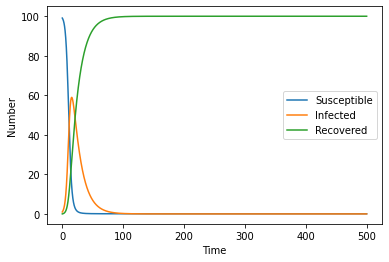

In [3]:
###########################
# Import relevant modules #
###########################
import matplotlib.pyplot as plt
import numpy as np

######################
# Defining constants #
######################
S0 = 99
I0 = 1
R0 = 0
beta = 0.5
gamma = 0.07
N = S0+I0+R0

# dt is the time step. The smaller this number is, the more resolved the graph would be.
dt = 0.1
t_max = 500

# Generate a list of time steps
ts = np.arange(0,t_max,dt)

##################################################
# Defining storage variables & initialising them #
##################################################
'''
The storage lists are defined this way so that I can use list indexing later,
And the upside is that the length of the storage list will always be the same as
our x-axis which is 'ts' and thus won't have the error of 'list index out of range'
'''
S_lst = [S0]*len(ts)
I_lst = [I0]*len(ts)
R_lst = [R0]*len(ts)


#######################################
# Modelling Code using Euler's Method #
#######################################

# Starting from index 1 because we already initialised index 0 using S0 / I0 / R0 above
for i in range(1, len(ts)):
    ''' 
    Using list indexing to follow and recreate the differential equations defined earlier
    Important to note that while doing euler's method is that the dSdt * dt so that we can
    calculate the change in S and add that to the existing S
    '''
    S_lst[i] = S_lst[i-1] - (beta * S_lst[i-1]*I_lst[i-1] / N)*dt
    I_lst[i] = I_lst[i-1] + (-gamma * I_lst[i-1] + beta * S_lst[i-1]*I_lst[i-1] / N)*dt
    R_lst[i] = R_lst[i-1] + gamma*I_lst[i-1] *dt
    
    
    
#################
# Plotting Code #
#################
plt.plot(ts, S_lst, label = 'Susceptible')
plt.plot(ts, I_lst, label = 'Infected')
plt.plot(ts, R_lst, label = 'Recovered')
plt.xlabel('Time')
plt.ylabel('Number')
plt.legend()
plt.show()

<p style text-align=justify>
    
## SIR model with Mask Wearing

### Changing our Model Equations

In order to add a term to our model to represent efficacy of wearing masks, we can just add a multiplier of $\alpha_m$ to our transmission term to get $\frac{\alpha_m \beta  S I}{N}$. $\alpha_m$ is a value from 0 to 1, with mask wearing being 100% effective in stopping the spread of the disease ($\alpha_m = 0$) and the inverse is true as well ($\alpha_m = 1$). This gives us a new set of equations:

$$ \frac{dS}{dt} = - \frac{\alpha_m \beta  S I}{N} , $$ <br>
$$ \frac{dI}{dt} =  \frac{\alpha_m \beta S I}{N} - \gamma I, $$ <br>
$$ \frac{dR}{dt} = \gamma I . $$

### Estimating new parameters

Let's say that we have a pandemic which we will call 'Divoc-91' and that in hopes of containing / slowing down the spread of the virus, the CDC implements a law that mask wearing is mandatory at all times. 

Furthermore, wearing masks are not 100% effective and not everyone wears their mask (if they do, some are wearing them inappropriately). So how do we model this behaviour? Thankfully, someone already did a study and found that mask wearing are 79% effective[$^{[3]}$](#References).

Since masks are 79% more effective, we would estimate our $\alpha_m$ to be 21%.
</p>

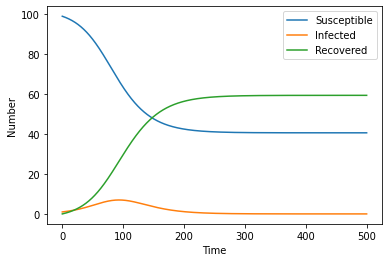

In [4]:
# New constant alpha_m
alpha_m = 0.21


##################################################
# Defining storage variables & initialising them #
##################################################
Sm_lst = [S0]*len(ts)
Im_lst = [I0]*len(ts)
Rm_lst = [R0]*len(ts)


#######################################
# Modelling Code using Euler's Method #
#######################################

# Starting from index 1 because we already initialised index 0 using S0 / I0 / R0 above
for i in range(1, len(ts)):
    Sm_lst[i] = Sm_lst[i-1] - (beta *alpha_m*Sm_lst[i-1]*Im_lst[i-1] / N)*dt
    Im_lst[i] = Im_lst[i-1] + (-gamma * Im_lst[i-1] + beta *alpha_m * Sm_lst[i-1]*Im_lst[i-1] / N)*dt
    Rm_lst[i] = Rm_lst[i-1] + gamma*Im_lst[i-1] *dt
    
    
    
#################
# Plotting Code #
#################
plt.plot(ts, Sm_lst, label = 'Susceptible')
plt.plot(ts, Im_lst, label = 'Infected')
plt.plot(ts, Rm_lst, label = 'Recovered')

plt.xlabel('Time')
plt.ylabel('Number')
plt.legend()
plt.show()

<p style text-align=justify>
One thing we can see straight away from the graph is that there are still a substantial number of susceptible people after the epidemic. This is not the case in our previous model. Thus it is important to analyse how effective mask wearing is!

## How effective is mask wearing

We now need to analyse how effective mask wearing is as compared to not wearing any masks. We can either just look at the raw numbers and compare but a nice approach is to generate a graph.

Thankfully, we already defined different variables and all our other constants are the same, so we can just compare those by plotting.
</p>

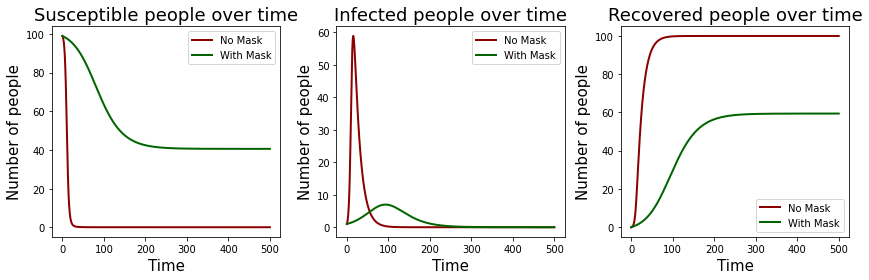

In [5]:
# Employ subplots so that its not messy #
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
ax1, ax2, ax3 = ax.ravel()


# Plot no mask wearing by using lines and colouring them red#
ax1.plot(ts, S_lst, 
         label = 'No Mask', color = 'darkred',
        linewidth = 2)

ax2.plot(ts, I_lst, 
         label = 'No Mask', color = 'darkred',
        linewidth = 2)

ax3.plot(ts, R_lst, 
         label = 'No Mask' , color = 'darkred',
        linewidth = 2)



# Plot no mask wearing by using lines and colouring them green#
ax1.plot(ts, Sm_lst, 
         label = 'With Mask', color = 'darkgreen',
        linewidth = 2)

ax2.plot(ts, Im_lst, 
         label = 'With Mask', color = 'darkgreen',
        linewidth = 2)

ax3.plot(ts, Rm_lst, 
         label = 'With Mask' , color = 'darkgreen',
        linewidth = 2)



# axis labelling & other pretty things #

ax1.set_title('Susceptible people over time', fontsize = 18)
ax1.set_xlabel('Time', fontsize = 15)
ax1.set_ylabel('Number of people', fontsize = 15)
ax1.legend()

ax2.set_title('Infected people over time', fontsize = 18)
ax2.set_xlabel('Time', fontsize = 15)
ax2.set_ylabel('Number of people', fontsize = 15)
ax2.legend()

ax3.set_title('Recovered people over time', fontsize = 18)
ax3.set_xlabel('Time', fontsize = 15)
ax3.set_ylabel('Number of people', fontsize = 15)
ax3.legend()

plt.tight_layout()
plt.show()

<p style text-align=justify>

## Analysis

Now that we have the graphs, it does look like wearing masks would allow for a longer time before the disease is wiped out at the caveat of having lesser people being infected (as evidenced by more susceptible people being left at the end in the mask wearing scenario). Does this mean that all of us should not be wearing mask so that we can "get this over with"?

Although our initial model does seem to suggest that, we did assume many things in our model which may not be realistic. As a result, to make even more meaningful insights, there are more work that needs to be done.

# Future Works

There are some things we can do to improve our model

1. Implement other restrictions such as safe distancing and vaccination rates
2. Implement other classes such as vaccinated individuals which CAN get infected but at a lower rate
3. Implement a SIVRS model where the recovered individuals are susceptible again

These are not an exhautive list as to what you can do, so let your imagination go wild!
</p>

# References

\[1\] Harko, T.; Lobo, F. S. N.; Mak, M. K. Exact Analytical Solutions of the Susceptible-Infected-Recovered (SIR) Epidemic Model and of the SIR Model with Equal Death and Birth Rates. Applied Mathematics and Computation, 2014, 236, 184–194. https://doi.org/10.1016/j.amc.2014.03.030.
<br>
\[2\] Sasaki, K. COVID-19 dynamics with SIR model, 2020.https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html (accessed Feb 20, 2022).
<br>
\[3\] Howard, J.; Huang, A.; Li, Z.; Tufekci, Z.; Zdimal, V.; van der Westhuizen, H.-M.; von Delft, A.; Price, A.; Fridman, L.; Tang, L.-H.; Tang, V.; Watson, G. L.; Bax, C. E.; Shaikh, R.; Questier, F.; Hernandez, D.; Chu, L. F.; Ramirez, C. M.; Rimoin, A. W. An Evidence Review of Face Masks against COVID-19. Proceedings of the National Academy of Sciences, 2021, 118, e2014564118. https://doi.org/10.1073/pnas.2014564118.